# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


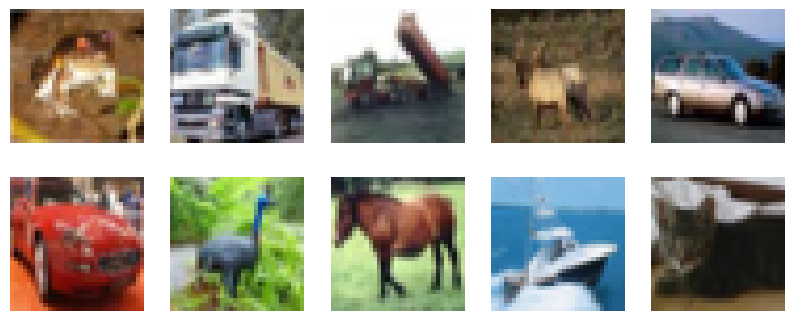

In [3]:
# Your code here :

# Display 10 random images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.show()

# Convert labels to One-Hot Encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# 3- Normalize the images.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [5]:
# Your code here :
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))

# Max pooling layer with pool size (2, 2)
model.add(MaxPooling2D((2,2)))

# Flatten the output
model.add(Flatten())

# Dense layer with 100 units and ReLU activation
model.add(Dense(100, activation = 'relu'))

# Classification layer with softmax activation
model.add(Dense(10, activation = 'softmax')) # 10 classes


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

history = model.fit( x_train,
           y_train_one_hot,
           epochs = 50,
           batch_size = 512,
           validation_data=(x_test, y_test_one_hot)
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.6606 - loss: 0.9887 - val_accuracy: 0.6163 - val_loss: 1.0946
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6594 - loss: 0.9879 - val_accuracy: 0.6150 - val_loss: 1.0921
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6645 - loss: 0.9695 - val_accuracy: 0.6024 - val_loss: 1.1118
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6661 - loss: 0.9692 - val_accuracy: 0.6174 - val_loss: 1.0987
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6653 - loss: 0.9715 - val_accuracy: 0.6095 - val_loss: 1.1017
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6689 - loss: 0.9613 - val_accuracy: 0.6090 - val_loss: 1.1040
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6651 - loss: 0.9637 - val_accuracy: 0.6172 - val_loss: 1.0823
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6726 - loss: 0.9561 - val_accuracy: 0.6114 - v

*   Plot the cross entropy loss curve and the accuracy curve

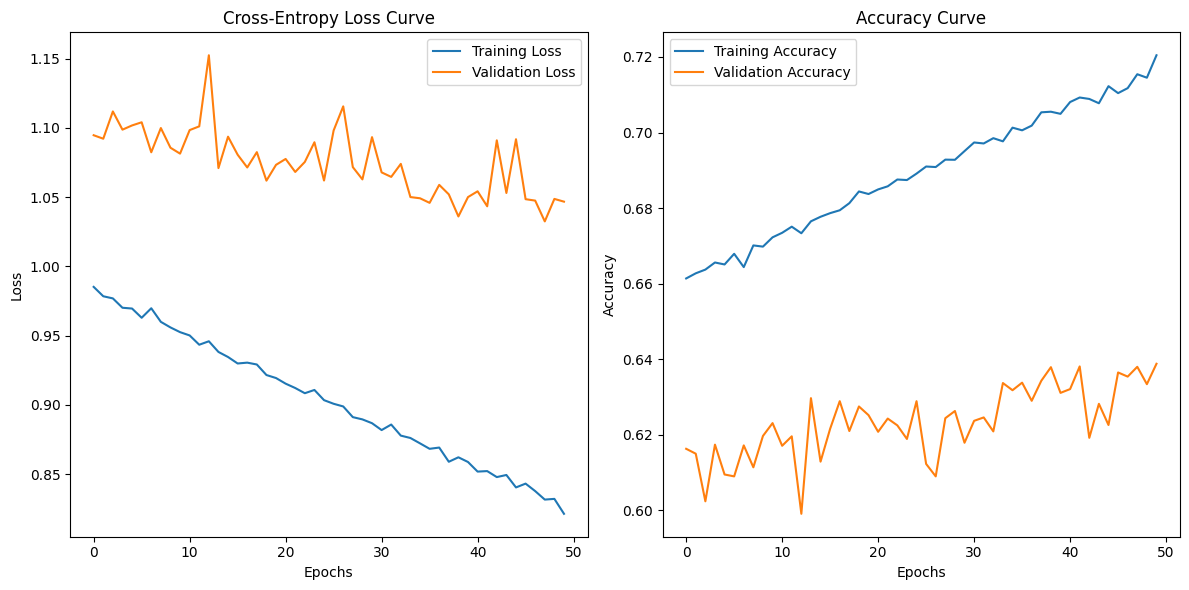

In [11]:
# Your code here :

# Plotting the loss curve
plt.figure(figsize=(12, 6))

# Plotting the training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [13]:
from keras.backend import clear_session
clear_session()

In [14]:
# Your code here :

model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Output classification layer with softmax activation
model.add(Dense(10, activation='softmax'))  # 10 classes


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [15]:
# Your code here :
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

history = model.fit( x_train,
           y_train_one_hot,
           epochs = 50,
           batch_size = 512,
           validation_data=(x_test, y_test_one_hot)
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.1004 - loss: 2.3029 - val_accuracy: 0.1002 - val_loss: 2.2996
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.1039 - loss: 2.2988 - val_accuracy: 0.1136 - val_loss: 2.2959
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.1340 - loss: 2.2948 - val_accuracy: 0.1613 - val_loss: 2.2895
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.1620 - loss: 2.2865 - val_accuracy: 0.1713 - val_loss: 2.2729
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.1778 - loss: 2.2641 - val_accuracy: 0.2070 - val_loss: 2.2151
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2142 - loss: 2.1827 - val_accuracy: 0.2532 - val_loss: 2.0669
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2495 - loss: 2.0749 - val_accuracy: 0.2882 - val_loss: 1.9690
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.2851 - loss: 1.9950 - val_accuracy: 0.2846 -

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


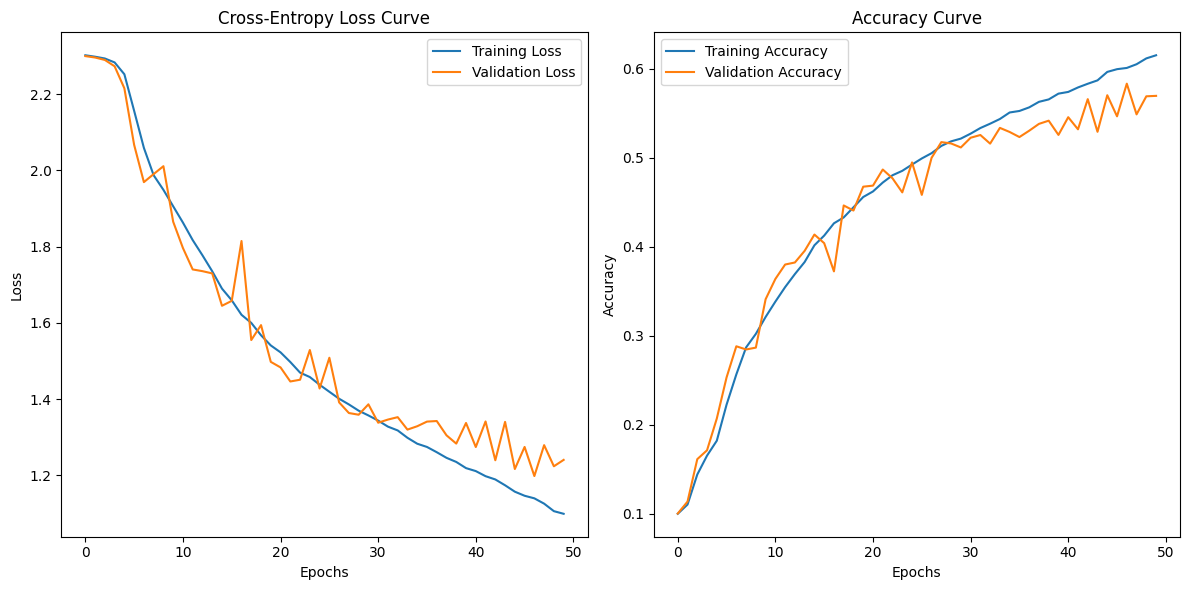

In [16]:
# Your code here :

# Plotting the loss curve
plt.figure(figsize=(12, 6))

# Plotting the training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

*The first model struggles with validation loss instability and poor generalization. In contrast, the second model shows significant improvement, with steadily decreasing loss and increasing accuracy, indicating more efficient learning and better generalization.*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


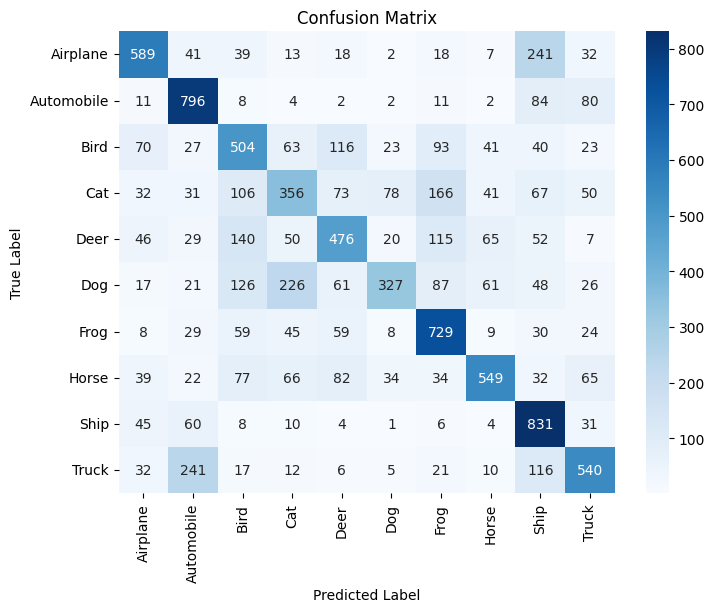

In [19]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate the confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred)

class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



**Comment here :**

**Analysis of the Confusion Matrix:**

**Strong Performance:**

The model classifies Ship (831 correct) and
Frog (729 correct) with high accuracy.

**Common Misclassifications:**

Airplane → Ship (241 times)

Truck → Automobile (241 times)

Bird → Cat & Deer (many cases)

...

*    Print the test accuracy for the trained model.

In [20]:
# Your code here :
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5717 - loss: 1.2407
Test accuracy: 0.5697000026702881


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [29]:
from keras.backend import clear_session
clear_session()

In [32]:
# Your code here :

# Resize images to 64x64
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_test = tf.image.resize(x_test, (64, 64)).numpy()

model = Sequential()

# First convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Second convolutional block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional block
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Output classification layer with softmax activation
model.add(Dense(10, activation='softmax'))  # 10 classes


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1055 - loss: 2.3012 - val_accuracy: 0.1103 - val_loss: 2.2972
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.1160 - loss: 2.2953 - val_accuracy: 0.1287 - val_loss: 2.2843
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 378ms/step - accuracy: 0.1342 - loss: 2.2748 - val_accuracy: 0.1872 - val_loss: 2.2143
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.2111 - loss: 2.1711 - val_accuracy: 0.2834 - val_loss: 2.0297
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.2653 - loss: 2.0589 - val_accuracy: 0.3240 - val_loss: 1.9622
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.2984 - loss: 1.9777 - val_accuracy: 0.3137 - val_loss: 1.9174
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.3196 - loss: 1.9249 - val_accuracy: 0.3678 - val_loss: 1.8162
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.3352 - loss: 1.8607 - val_accura

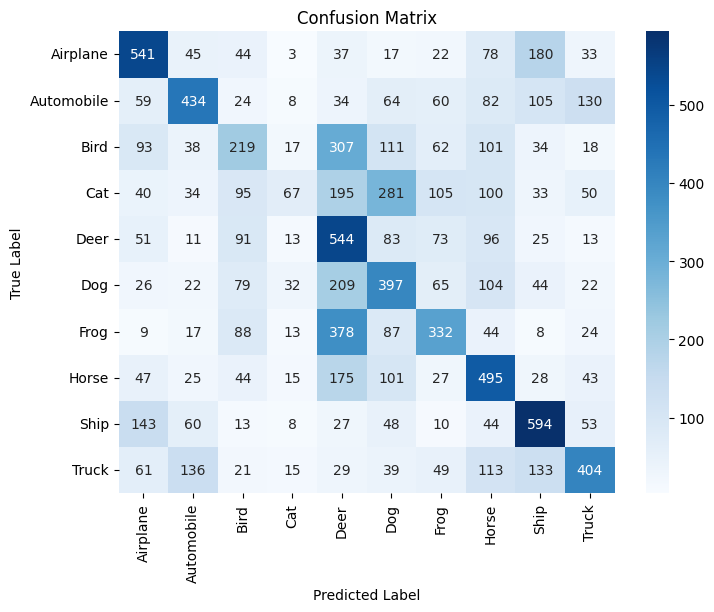

In [33]:
# Your code here :
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

history = model.fit( x_train,
           y_train_one_hot,
           epochs = 10,
           batch_size = 512,
           validation_data=(x_test, y_test_one_hot)
)

# Calculate the confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred)

class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Observations from the Confusion Matrix:**
* Strong Performance:
"Ship" and "Truck" have high correct predictions.
"Frog" and "Deer" are also well classified.
* Class Confusions:
"Bird" is often misclassified as "Deer" or "Cat".
"Automobile" is sometimes confused with "Truck".
"Airplane" is often mistaken for "Ship".

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns and map inputs to outputs effectively.
Without activation functions, a neural network would only perform linear transformations, limiting its ability to model complex data.

_

2 - Key Differences between sigmoid and softmax:

 - **Sigmoid** outputs a value between 0 and 1 for each neuron, making it useful for binary classification, where each output represents the probability of a single class.
 - **Softmax** outputs a probability distribution across multiple classes (summing to 1), making it ideal for multi-class classification, where the model predicts the most likely class from a set of multiple possible outcomes.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

 - **Categorical Crossentropy** is used for multi-class classification problems
 - **Binary Crossentropy** is used for binary classification


_
